<a href="https://colab.research.google.com/github/ruslanalishchynska/DL-ML/blob/master/LeNetMod_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import random

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [0]:
import torchvision.datasets

In [0]:
MNIST_train = torchvision.datasets.MNIST('./', download = True, train = True)
MNIST_test = torchvision.datasets.MNIST('./', download = True, train = False)

In [4]:
x_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
x_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
x_train = x_train.unsqueeze(1).float() #inserts singleton dim at position given as parameter
x_test = x_test.unsqueeze(1).float()

In [6]:
x_train.shape

torch.Size([60000, 1, 28, 28])

In [0]:
class LeNetMod(torch.nn.Module):
  def __init__(self):
    super(LeNetMod, self).__init__()

    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1)
    self.act1 = torch.nn.ELU()
    self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding=1)
    self.act2 = torch.nn.ELU()

    self.conv3 = torch.nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1)
    self.act3 = torch.nn.ELU()
    self.pool3 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv4 = torch.nn.Conv2d(in_channels=24, out_channels=48, kernel_size=3, padding=0)
    self.act4 = torch.nn.ELU()

    self.fc1 = torch.nn.Linear(5 * 5 * 48, 150)
    self.act5 = torch.nn.ReLU()

    self.fc2 = torch.nn.Linear(150, 84)
    self.act6 = torch.nn.ReLU()

    self.fc3 = torch.nn.Linear(84, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.act2(x)

    x = self.conv3(x)
    x = self.act3(x)
    x = self.pool3(x)

    x = self.conv4(x)
    x = self.act4(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

    x = self.fc1(x)
    x = self.act5(x)
    x = self.fc2(x)
    x = self.act6(x)
    x = self.fc3(x)

    return x

lenet_mod = LeNetMod()

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet_mod.parameters(), lr=0.001)

In [9]:
batch_size = 200

test_accuracy_history = []
test_loss_history = []

for epoch in range(10000):
  order = np.random.permutation(len(x_train))
  for start_index in range(0, len(x_train), batch_size):
    optimizer.zero_grad()
    batch_indexes = order[start_index:start_index+batch_size]

    x_batch = x_train[batch_indexes]
    y_batch = y_train[batch_indexes]

    pred = lenet_mod.forward(x_batch)

    loss_value = loss(pred, y_batch)
    loss_value.backward()

    optimizer.step()

  test_pred = lenet_mod.forward(x_test)
  test_loss_history.append(loss(test_pred, y_test))

  accuracy = (test_pred.argmax(dim=1) == y_test).float().mean()
  test_accuracy_history.append(accuracy)

  print(accuracy)

tensor(0.9815)
tensor(0.9861)
tensor(0.9892)
tensor(0.9907)
tensor(0.9905)
tensor(0.9889)
tensor(0.9889)
tensor(0.9899)
tensor(0.9894)
tensor(0.9873)
tensor(0.9892)
tensor(0.9899)
tensor(0.9891)
tensor(0.9894)
tensor(0.9909)
tensor(0.9906)
tensor(0.9898)
tensor(0.9874)
tensor(0.9886)
tensor(0.9913)
tensor(0.9893)
tensor(0.9898)
tensor(0.9899)
tensor(0.9874)


KeyboardInterrupt: ignored

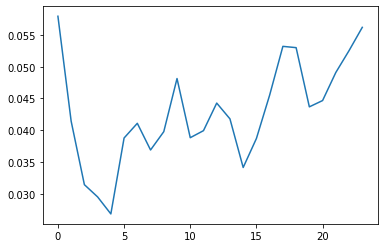

In [11]:
import matplotlib.pyplot as plt
plt.plot(test_loss_history)